In [1]:
import pandas as pd

In [2]:
df_items_ratings = pd.read_csv('../data/sample_dataset_1.csv', header=None, names=['item', 'user', 'rating'])
df_items_ratings

,item,user,rating
0,bulb,20,6.5
1,tube,20,5.0
2,fan,20,6.0
3,tube,21,6.0
4,bulb,21,7.0
5,bulb,23,7.5
6,fan,23,6.0


## Task 1: Plot the average rating for each item

### Find unique items and their frequencies

In [3]:
df_items_ratings.item.nunique()

3

In [4]:
df_items_ratings.item.value_counts()

bulb    3
fan     2
tube    2
Name: item, dtype: int64

### Use groupby() to create groups of items

In [5]:
df_items_ratings_gb_item = df_items_ratings.groupby('item')

### Calculate the average rating for each unique item (group) by iterating through each group

In [6]:
average_ratings = []
for group_name, group_data in df_items_ratings_gb_item.groups.items():
    average_ratings.append((group_name, df_items_ratings_gb_item.get_group(group_name).rating.mean()))
average_ratings

[('bulb', 7.0), ('fan', 6.0), ('tube', 5.5)]

In [7]:
df_average_ratings = pd.DataFrame(average_ratings, columns=['item', 'avg_rating'])
df_average_ratings

,item,avg_rating
0,bulb,7.0
1,fan,6.0
2,tube,5.5


### First, let's try a line plot, which is the default graph type in pandas.plot()

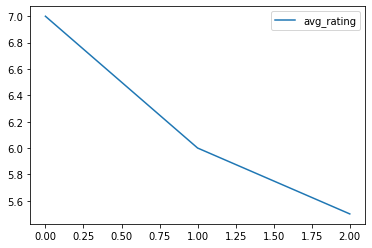

In [8]:
df_average_ratings.plot()

#### Many things are left desired in the plot above, such as proper label. But the most important thing to note is that the type of plot is not suitable for the case at hand.

#### Line charts are great to show change over time.

### Try a pie chart, maybe?

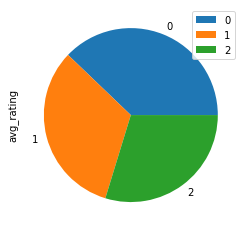

In [9]:
df_average_ratings.plot(kind='pie', y='avg_rating')

#### As we can see, pie chart is also not suitable for this case.

#### Pie charts are great to show proportions.

### Plot a barchart, which is the most appropriate type for this particular case.

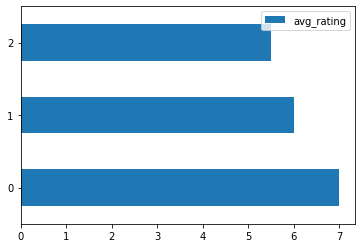

In [10]:
df_average_ratings.plot(kind='barh')

### Set the item name as index, so that the barchart would get the labels automatically

In [11]:
df_average_ratings.set_index('item', inplace=True)
df_average_ratings

,avg_rating
item,
bulb,7.0
fan,6.0
tube,5.5


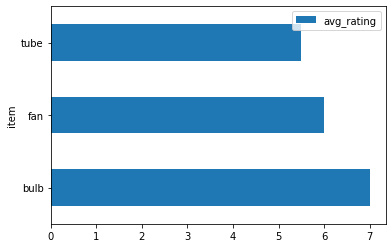

In [12]:
df_average_ratings.plot(kind='barh')

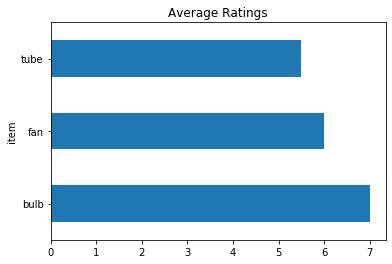

In [13]:
df_average_ratings.plot(kind='barh', legend=False, title='Average Ratings')

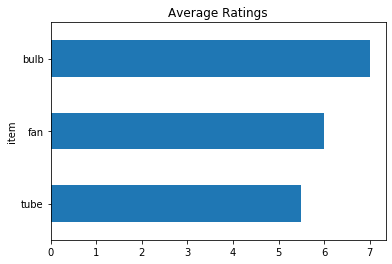

In [14]:
df_average_ratings.sort_values(by='avg_rating').plot(kind='barh', legend=False, title='Average Ratings')

## Task 2: plot the sales amounts for each month

In [15]:
df_shampoo_sales_data = pd.read_csv('../data/shampoo_sales_data.csv')
df_shampoo_sales_data

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


### Line chart is the most appropriate for this case, try a default line chart first

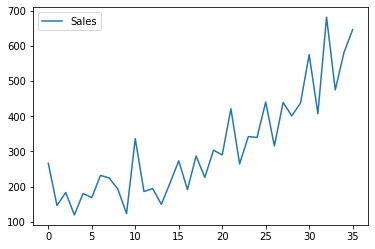

In [16]:
df_shampoo_sales_data.plot()

### Set proper labels

In [17]:
df_shampoo_sales_data.set_index('Month', inplace=True)

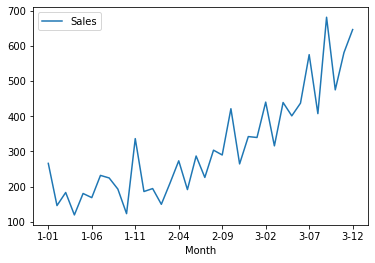

In [18]:
df_shampoo_sales_data.plot()

### Let's see what happens when you use a sub-optimal graph type for this particular case

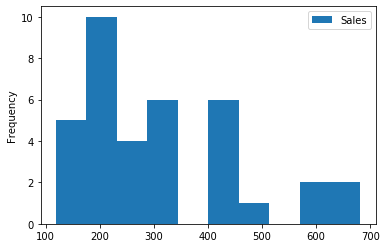

In [19]:
df_shampoo_sales_data.plot(kind='hist')

#### As you can see this is not the best idea! As it does not sove the particular task of showing sales figures for each month. 

#### However, it can present the same data with a different note if done properly.

In [20]:
df_shampoo_sales_data.loc[(df_shampoo_sales_data.Sales > 100) & (df_shampoo_sales_data.Sales < 180)]

,Sales
Month,
1-02,145.9
1-04,119.3
1-06,168.5
1-10,122.9
2-02,149.5


#### Fix the bins and the bar alignments, also add lables

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
np.histogram_bin_edges(df_shampoo_sales_data)

array([119.3 , 175.57, 231.84, 288.11, 344.38, 400.65, 456.92, 513.19,
       569.46, 625.73, 682.  ])

In [23]:
def align_bin_edges(df, figure_size, plot_title, x_label):
    bin_edges = np.histogram_bin_edges(df)
    fig = plt.figure(figsize=figure_size)
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(plot_title)
    ax.set_xlabel(x_label)
    plt.xticks(bin_edges)
    return ax, bin_edges

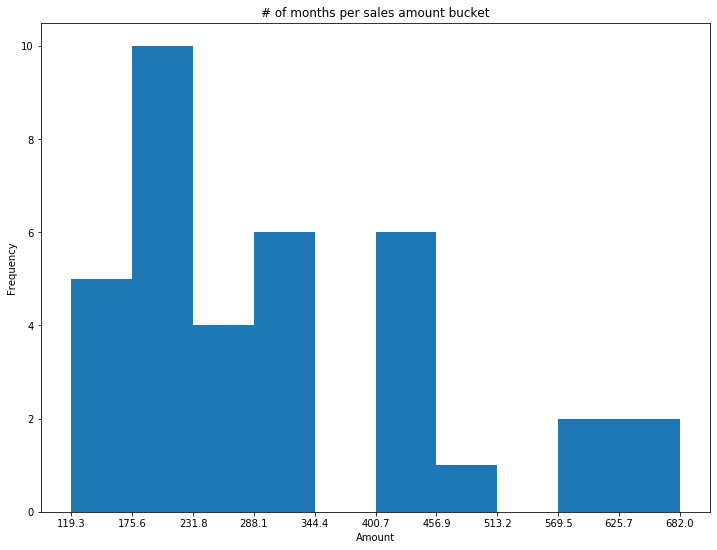

In [24]:
ax1, be1 = align_bin_edges(df_shampoo_sales_data, (12, 9), '# of months per sales amount bucket', 'Amount')
df_shampoo_sales_data.plot(kind='hist', ax=ax1, bins=be1, legend=False)

In [25]:
df_shampoo_sales_data.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


### Make a better line chart

([<matplotlib.axis.XTick at 0x7f2b829d2f10>,
 <a list of 36 Text xticklabel objects>)

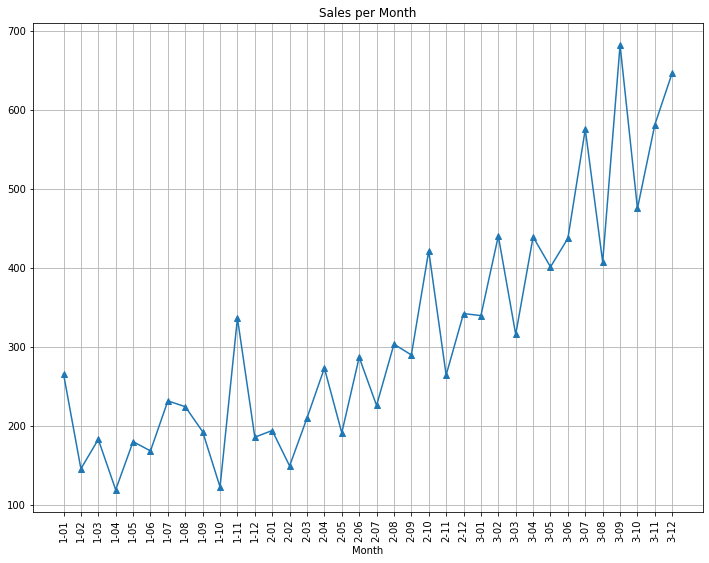

In [26]:
df_shampoo_sales_data.plot(figsize=(12, 9), grid=True, title='Sales per Month', legend=False, marker='^')
plt.xticks(rotation=90, ticks=np.arange(0, 36), labels=df_shampoo_sales_data.index.tolist())

## Task 3: EDA for 'car' dataset

In [27]:
df_car_eval_data = pd.read_csv('../data/car.data', header=None, 
                               names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'car_eval'])

### Text EDA

In [28]:
df_car_eval_data.head()

,buying,maint,doors,persons,lug_boot,safety,car_eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


#### In a dataset, normally you have 2 types of variables:

<pre>
X, also called Features, or Independent Variables, Input Variables, Source Variable
Y, also called Label, or Dependent Variable, Output Variable, Target Variable
</pre>

In [29]:
def get_df_info(df, include_unique_values=False):
    col_name_list = list(df.columns)
    col_type_list = [type(cell) for cell in df.iloc[0, :]]
    col_null_count_list = [df[col].isnull().sum() for col in col_name_list]
    col_unique_count_list = [df[col].nunique() for col in col_name_list]
    col_mem_usage_list = [df[col].memory_usage(deep=True) for col in col_name_list]
    total_memory_usage = sum(col_mem_usage_list) / 1048576
    if include_unique_values:
        col_unique_list = [df[col].unique() for col in col_name_list]
        df_info = pd.DataFrame({'column_name': col_name_list, 'type': col_type_list, 
                                'null_count': col_null_count_list, 'nunique': col_unique_count_list, 
                                'unique_values': col_unique_list})
    else:
        df_info = pd.DataFrame({'column_name': col_name_list, 'type': col_type_list, 
                        'null_count': col_null_count_list, 'nunique': col_unique_count_list})
    return df_info, total_memory_usage

In [30]:
df_car_eval_data_info, df_car_eval_data_mem = get_df_info(df_car_eval_data, include_unique_values=True)
print('{} has {} row and {} cols, uses approx. {:.2f} MB'.format('df_car_eval_data', df_car_eval_data.shape[0],
                                                                 df_car_eval_data.shape[1], df_car_eval_data_mem))
df_car_eval_data_info

df_car_eval_data has 1728 row and 7 cols, uses approx. 0.71 MB


,column_name,type,null_count,nunique,unique_values
0,buying,<class 'str'>,0,4,"[vhigh, high, med, low]"
1,maint,<class 'str'>,0,4,"[vhigh, high, med, low]"
2,doors,<class 'str'>,0,4,"[2, 3, 4, 5more]"
3,persons,<class 'str'>,0,3,"[2, 4, more]"
4,lug_boot,<class 'str'>,0,3,"[small, med, big]"
5,safety,<class 'str'>,0,3,"[low, med, high]"
6,car_eval,<class 'str'>,0,4,"[unacc, acc, vgood, good]"


In [31]:
df_car_eval_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   car_eval  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


#### Data Wrangling for further EDA

In [32]:
df_car_eval_data_cleaned = df_car_eval_data.copy()

In [33]:
df_car_eval_data_cleaned = df_car_eval_data_cleaned.astype('category')

In [34]:
df_car_eval_data_cleaned.head()

,buying,maint,doors,persons,lug_boot,safety,car_eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [35]:
df_car_eval_data_cleaned_info, df_car_eval_data_cleaned_mem = get_df_info(df_car_eval_data_cleaned, include_unique_values=True)
print('{} has {} row and {} cols, uses approx. {:.2f} MB'.format('df_car_eval_data_cleaned', df_car_eval_data_cleaned.shape[0],
                                                                 df_car_eval_data_cleaned.shape[1], df_car_eval_data_cleaned_mem))
df_car_eval_data_cleaned_info

df_car_eval_data_cleaned has 1728 row and 7 cols, uses approx. 0.01 MB


,column_name,type,null_count,nunique,unique_values
0,buying,<class 'str'>,0,4,"[vhigh, high, med, low] Categories (4, object)..."
1,maint,<class 'str'>,0,4,"[vhigh, high, med, low] Categories (4, object)..."
2,doors,<class 'str'>,0,4,"[2, 3, 4, 5more] Categories (4, object): [2, 3..."
3,persons,<class 'str'>,0,3,"[2, 4, more] Categories (3, object): [2, 4, more]"
4,lug_boot,<class 'str'>,0,3,"[small, med, big] Categories (3, object): [sma..."
5,safety,<class 'str'>,0,3,"[low, med, high] Categories (3, object): [low,..."
6,car_eval,<class 'str'>,0,4,"[unacc, acc, vgood, good] Categories (4, objec..."


In [36]:
for c in df_car_eval_data_cleaned.columns:
    df_car_eval_data_cleaned[c] = df_car_eval_data_cleaned[c].cat.codes

In [37]:
df_car_eval_data_cleaned.head()

,buying,maint,doors,persons,lug_boot,safety,car_eval
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [38]:
df_car_eval_data_cleaned_info, df_car_eval_data_cleaned_mem = get_df_info(df_car_eval_data_cleaned, include_unique_values=True)
print('{} has {} row and {} cols, uses approx. {:.2f} MB'.format('df_car_eval_data_cleaned', df_car_eval_data_cleaned.shape[0],
                                                                 df_car_eval_data_cleaned.shape[1], df_car_eval_data_cleaned_mem))
df_car_eval_data_cleaned_info

df_car_eval_data_cleaned has 1728 row and 7 cols, uses approx. 0.01 MB


,column_name,type,null_count,nunique,unique_values
0,buying,<class 'int'>,0,4,"[3, 0, 2, 1]"
1,maint,<class 'int'>,0,4,"[3, 0, 2, 1]"
2,doors,<class 'int'>,0,4,"[0, 1, 2, 3]"
3,persons,<class 'int'>,0,3,"[0, 1, 2]"
4,lug_boot,<class 'int'>,0,3,"[2, 1, 0]"
5,safety,<class 'int'>,0,3,"[1, 2, 0]"
6,car_eval,<class 'int'>,0,4,"[2, 0, 3, 1]"


### Correlation analysis

In [39]:
df_car_eval_data_cleaned_corr = df_car_eval_data_cleaned.corr()
df_car_eval_data_cleaned_corr

,buying,maint,doors,persons,lug_boot,safety,car_eval
buying,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051424
maint,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.040194
doors,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.031327
persons,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.299468
lug_boot,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.033184
safety,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.021044
car_eval,0.051424,0.040194,-0.031327,-0.299468,0.033184,-0.021044,1.000000


#### The rather unique property of this dataset as you notices is 0 corr between all x variables. This is quite rare in real-world datsets!

#### Plot the corr table

In [40]:
import matplotlib.pyplot as plt

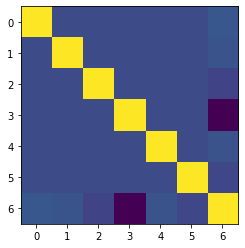

In [41]:
plt.imshow(df_car_eval_data_cleaned_corr)

#### Improve the above heatmap

([<matplotlib.axis.YTick at 0x7f2b828e7190>,
 <a list of 7 Text yticklabel objects>)

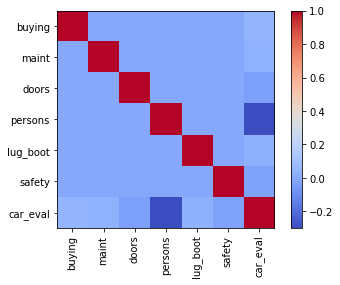

In [42]:
plt.imshow(df_car_eval_data_cleaned_corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(df_car_eval_data_cleaned_corr)), df_car_eval_data_cleaned_corr.columns, rotation=90)
plt.yticks(range(len(df_car_eval_data_cleaned_corr)), df_car_eval_data_cleaned_corr.index)

#### A better and easier heatmap using Seaborn

In [43]:
import seaborn as sb

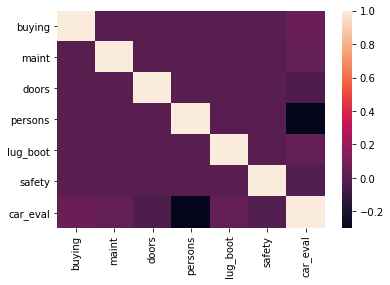

In [44]:
sb.heatmap(df_car_eval_data_cleaned_corr)

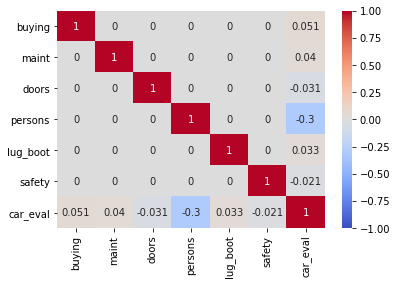

In [45]:
sb.heatmap(df_car_eval_data_cleaned_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

#### Some aspects of the corrections are difficult to interpret and also will probably cause errors in further EDA, as a result of the automatic mapping from original string values to numeric values using category codes. 

#### Hence, we shall create custom mapping and redo corr analysis for correct understand and reflection of correlations.

In [46]:
df_car_eval_data_numeric = df_car_eval_data.copy()

In [47]:
df_car_eval_data_numeric_info, df_car_eval_data_numeric_mem = get_df_info(df_car_eval_data_numeric, include_unique_values=True)
print('{} has {} row and {} cols, uses approx. {:.2f} MB'.format('df_car_eval_data_numeric', df_car_eval_data_numeric.shape[0],
                                                                 df_car_eval_data_numeric.shape[1], df_car_eval_data_numeric_mem))
df_car_eval_data_numeric_info

df_car_eval_data_numeric has 1728 row and 7 cols, uses approx. 0.71 MB


,column_name,type,null_count,nunique,unique_values
0,buying,<class 'str'>,0,4,"[vhigh, high, med, low]"
1,maint,<class 'str'>,0,4,"[vhigh, high, med, low]"
2,doors,<class 'str'>,0,4,"[2, 3, 4, 5more]"
3,persons,<class 'str'>,0,3,"[2, 4, more]"
4,lug_boot,<class 'str'>,0,3,"[small, med, big]"
5,safety,<class 'str'>,0,3,"[low, med, high]"
6,car_eval,<class 'str'>,0,4,"[unacc, acc, vgood, good]"


In [48]:
def get_cat_codes(str_val, col_name):
    
    if str_val in ['low', '2', 'small', 'unacc']:
        return 0
    
    if str_val in ['med', '3', 'acc']:
        return 1
    
    if str_val in ['high', 'more', 'big', 'good']:
        return 2
    
    if str_val in ['vhigh', '5more', 'vgood']:
        return 3
    
    if str_val == '4' and col_name == 'persons':
        return 1
    else:
        return 2

In [49]:
for c in df_car_eval_data_numeric.columns:
    df_car_eval_data_numeric['x_' + c] = df_car_eval_data_numeric[c].apply(lambda x: get_cat_codes(x, c))

In [50]:
df_car_eval_data_numeric.head()

,buying,maint,doors,persons,lug_boot,safety,car_eval,x_buying,x_maint,x_doors,x_persons,x_lug_boot,x_safety,x_car_eval
0,vhigh,vhigh,2,2,small,low,unacc,3,3,0,0,0,0,0
1,vhigh,vhigh,2,2,small,med,unacc,3,3,0,0,0,1,0
2,vhigh,vhigh,2,2,small,high,unacc,3,3,0,0,0,2,0
3,vhigh,vhigh,2,2,med,low,unacc,3,3,0,0,1,0,0
4,vhigh,vhigh,2,2,med,med,unacc,3,3,0,0,1,1,0


In [51]:
df_car_eval_data_numeric_info, df_car_eval_data_numeric_mem = get_df_info(df_car_eval_data_numeric, include_unique_values=True)
print('{} has {} row and {} cols, uses approx. {:.2f} MB'.format('df_car_eval_data_numeric', df_car_eval_data_numeric.shape[0],
                                                                 df_car_eval_data_numeric.shape[1], df_car_eval_data_numeric_mem))
df_car_eval_data_numeric_info

df_car_eval_data_numeric has 1728 row and 14 cols, uses approx. 0.81 MB


,column_name,type,null_count,nunique,unique_values
0,buying,<class 'str'>,0,4,"[vhigh, high, med, low]"
1,maint,<class 'str'>,0,4,"[vhigh, high, med, low]"
2,doors,<class 'str'>,0,4,"[2, 3, 4, 5more]"
3,persons,<class 'str'>,0,3,"[2, 4, more]"
4,lug_boot,<class 'str'>,0,3,"[small, med, big]"
5,safety,<class 'str'>,0,3,"[low, med, high]"
6,car_eval,<class 'str'>,0,4,"[unacc, acc, vgood, good]"
7,x_buying,<class 'numpy.int64'>,0,4,"[3, 2, 1, 0]"
8,x_maint,<class 'numpy.int64'>,0,4,"[3, 2, 1, 0]"
9,x_doors,<class 'numpy.int64'>,0,4,"[0, 1, 2, 3]"


In [52]:
df_car_eval_data_numeric = df_car_eval_data_numeric.iloc[:, 7:]

In [53]:
df_car_eval_data_numeric.columns = df_car_eval_data.columns

In [54]:
df_car_eval_data_numeric

,buying,maint,doors,persons,lug_boot,safety,car_eval
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,3,2,1,1,2
1724,0,0,3,2,1,2,3
1725,0,0,3,2,2,0,0
1726,0,0,3,2,2,1,2


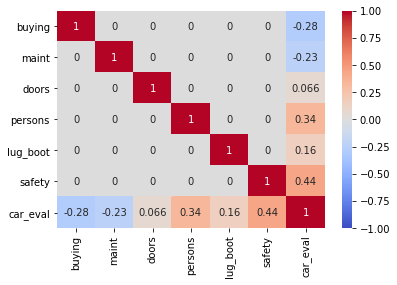

In [55]:
sb.heatmap(df_car_eval_data_numeric.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

#### Now you can see that these correlations between each x and y make sense!

#### TODO FOR YOU: Do you think there is just 'no correlation' between the features, or more than just 'no correlation'? 

If yes, what would you call it - 'no association' or maybe 'no causation'? 
If no, why?

### Undertanding relationship between variables using Scatterplots

([<matplotlib.axis.YTick at 0x7f2b7cebd890>,
 <a list of 4 Text yticklabel objects>)

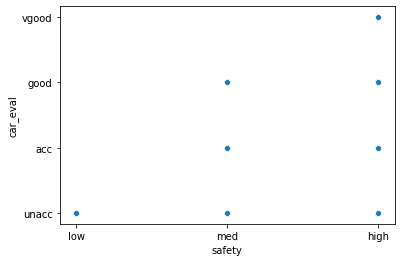

In [56]:
sb.scatterplot(x='safety', y='car_eval', data=df_car_eval_data_numeric)
plt.xticks(ticks=np.arange(0, 3), labels=['low', 'med', 'high'])
plt.yticks(ticks=np.arange(0, 4), labels=['unacc', 'acc', 'good', 'vgood'])

([<matplotlib.axis.YTick at 0x7f2b7ce2c910>,
 <a list of 4 Text yticklabel objects>)

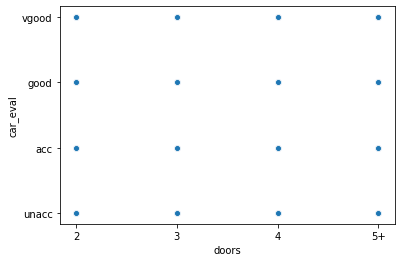

In [57]:
sb.scatterplot(x='doors', y='car_eval', data=df_car_eval_data_numeric)
plt.xticks(ticks=np.arange(0, 4), labels=['2', '3', '4', '5+'])
plt.yticks(ticks=np.arange(0, 4), labels=['unacc', 'acc', 'good', 'vgood'])

### At a glance using a pairplot - a fusion of multiple scatterplots and histograms

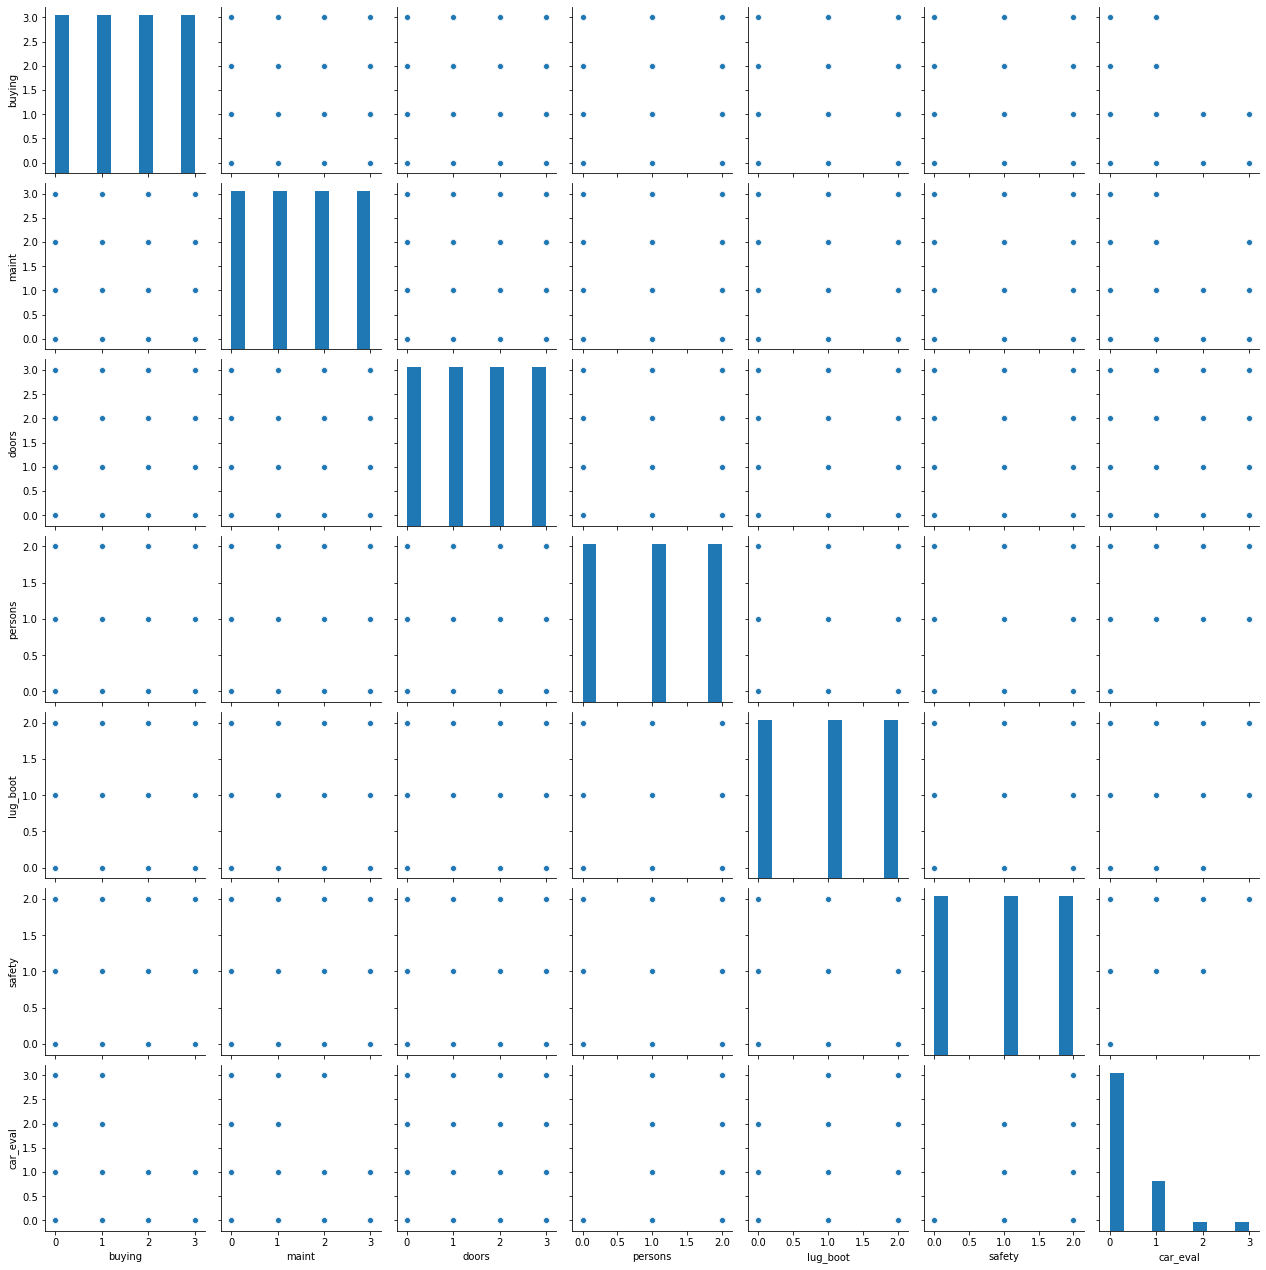

In [58]:
sb.pairplot(df_car_eval_data_numeric)

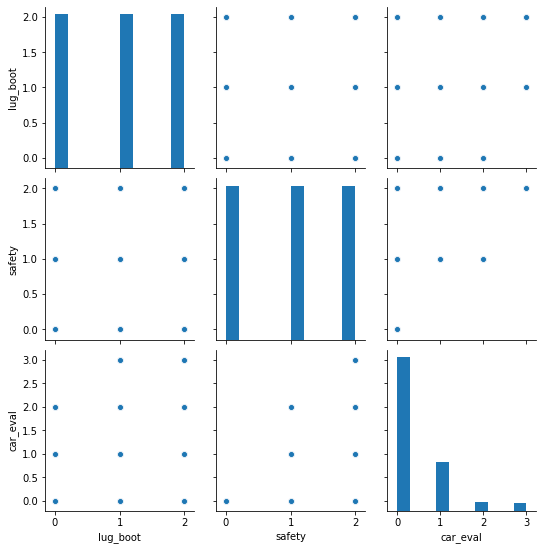

In [59]:
sb.pairplot(df_car_eval_data_numeric, vars=['lug_boot', 'safety', 'car_eval'])

### Single scatterplot with linear regression modelling 

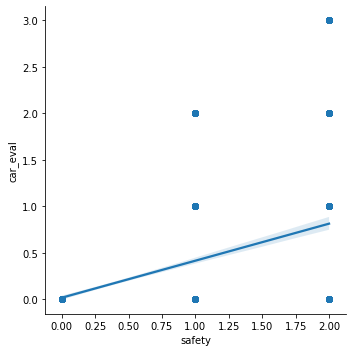

In [60]:
sb.lmplot(x='safety', y='car_eval', data=df_car_eval_data_numeric)

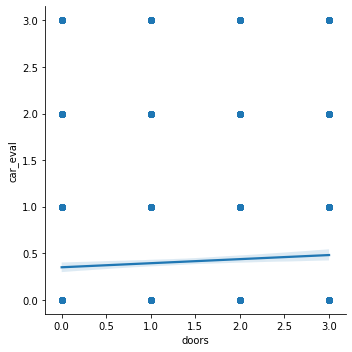

In [61]:
sb.lmplot(x='doors', y='car_eval', data=df_car_eval_data_numeric)

### Multiple scatterplots with faceting

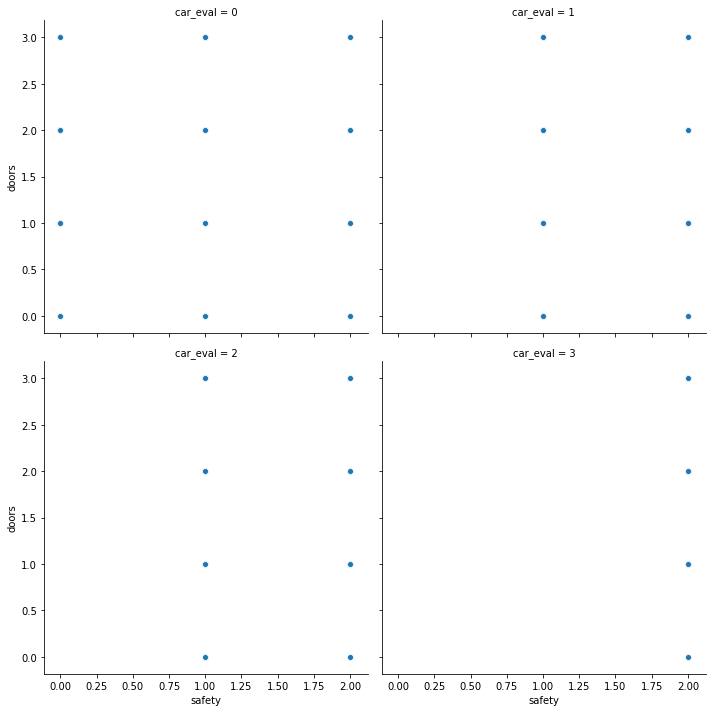

In [62]:
sb.relplot(x='safety', y='doors', col='car_eval', col_wrap=2, data=df_car_eval_data_numeric)

## Task 4: EDA for 'post-operative' dataset

In [63]:
df_po_raw_data = pd.read_csv('../data/post-operative.dat', header=None, names=['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL', 'COMFORT', 'Decision'], skiprows=13)

### Text-based EDA

In [64]:
df_po_raw_data.head()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,Decision
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


In [65]:
df_po_raw_data_info, df_po_raw_data_mem = get_df_info(df_po_raw_data, include_unique_values=True)
print('{} has {} rows and {} cols, uses approx. {:.2f} MB'.format('df_po_raw_data_pp', df_po_raw_data.shape[0], 
                                                                  df_po_raw_data.shape[1], df_po_raw_data_mem))
df_po_raw_data_info

df_po_raw_data_pp has 90 rows and 9 cols, uses approx. 0.05 MB


,column_name,type,null_count,nunique,unique_values
0,L-CORE,<class 'str'>,0,3,"[mid, high, low]"
1,L-SURF,<class 'str'>,0,3,"[low, high, mid]"
2,L-O2,<class 'str'>,0,2,"[excellent, good]"
3,L-BP,<class 'str'>,0,3,"[mid, high, low]"
4,SURF-STBL,<class 'str'>,0,2,"[stable, unstable]"
5,CORE-STBL,<class 'str'>,0,3,"[stable, unstable, mod-stable]"
6,BP-STBL,<class 'str'>,0,3,"[stable, mod-stable, unstable]"
7,COMFORT,<class 'str'>,0,5,"[15, 10, 05, 07, ?]"
8,Decision,<class 'str'>,0,3,"[A, S, I]"


### Data Pre-Processing

In [66]:
df_po_raw_data_pp = df_po_raw_data.copy()
df_po_raw_data_pp.COMFORT.replace('?', df_po_raw_data_pp.COMFORT.mode()[0], inplace=True)

In [67]:
def get_cat_codes_po(str_val):
    if str_val in ['low', 'unstable', '05', 'I']:
        return 0
    if str_val in ['high', 'good', 'mod-stable', '07', '10', 'A']:
        return 1
    if str_val in ['mid', 'excellent', 'stable', '15', 'S']:
        return 2      

In [68]:
for c in df_po_raw_data_pp.columns:
    df_po_raw_data_pp['x_' + c] = df_po_raw_data_pp[c].apply(lambda x: get_cat_codes_po(x))

In [69]:
df_po_raw_data_pp_info, df_po_raw_data_pp_mem = get_df_info(df_po_raw_data_pp, include_unique_values=True)
print('{} has {} rows and {} cols, uses approx. {:.2f} MB'.format('df_po_raw_data_pp', df_po_raw_data_pp.shape[0], 
                                                                  df_po_raw_data_pp.shape[1], df_po_raw_data_pp_mem))
df_po_raw_data_pp_info

df_po_raw_data_pp has 90 rows and 18 cols, uses approx. 0.06 MB


,column_name,type,null_count,nunique,unique_values
0,L-CORE,<class 'str'>,0,3,"[mid, high, low]"
1,L-SURF,<class 'str'>,0,3,"[low, high, mid]"
2,L-O2,<class 'str'>,0,2,"[excellent, good]"
3,L-BP,<class 'str'>,0,3,"[mid, high, low]"
4,SURF-STBL,<class 'str'>,0,2,"[stable, unstable]"
5,CORE-STBL,<class 'str'>,0,3,"[stable, unstable, mod-stable]"
6,BP-STBL,<class 'str'>,0,3,"[stable, mod-stable, unstable]"
7,COMFORT,<class 'str'>,0,4,"[15, 10, 05, 07]"
8,Decision,<class 'str'>,0,3,"[A, S, I]"
9,x_L-CORE,<class 'numpy.int64'>,0,3,"[2, 1, 0]"


In [70]:
df_po_raw_data_pp.drop(df_po_raw_data.columns, axis=1, inplace=True)
df_po_raw_data_pp.columns = df_po_raw_data.columns

In [71]:
df_po_raw_data_pp.head()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,Decision
0,2,0,2,2,2,2,2,2,1
1,2,1,2,1,2,2,2,1,2
2,1,0,2,1,2,2,1,1,1
3,2,0,1,1,2,0,1,2,1
4,2,2,2,1,2,2,2,1,1


### Visual EDA

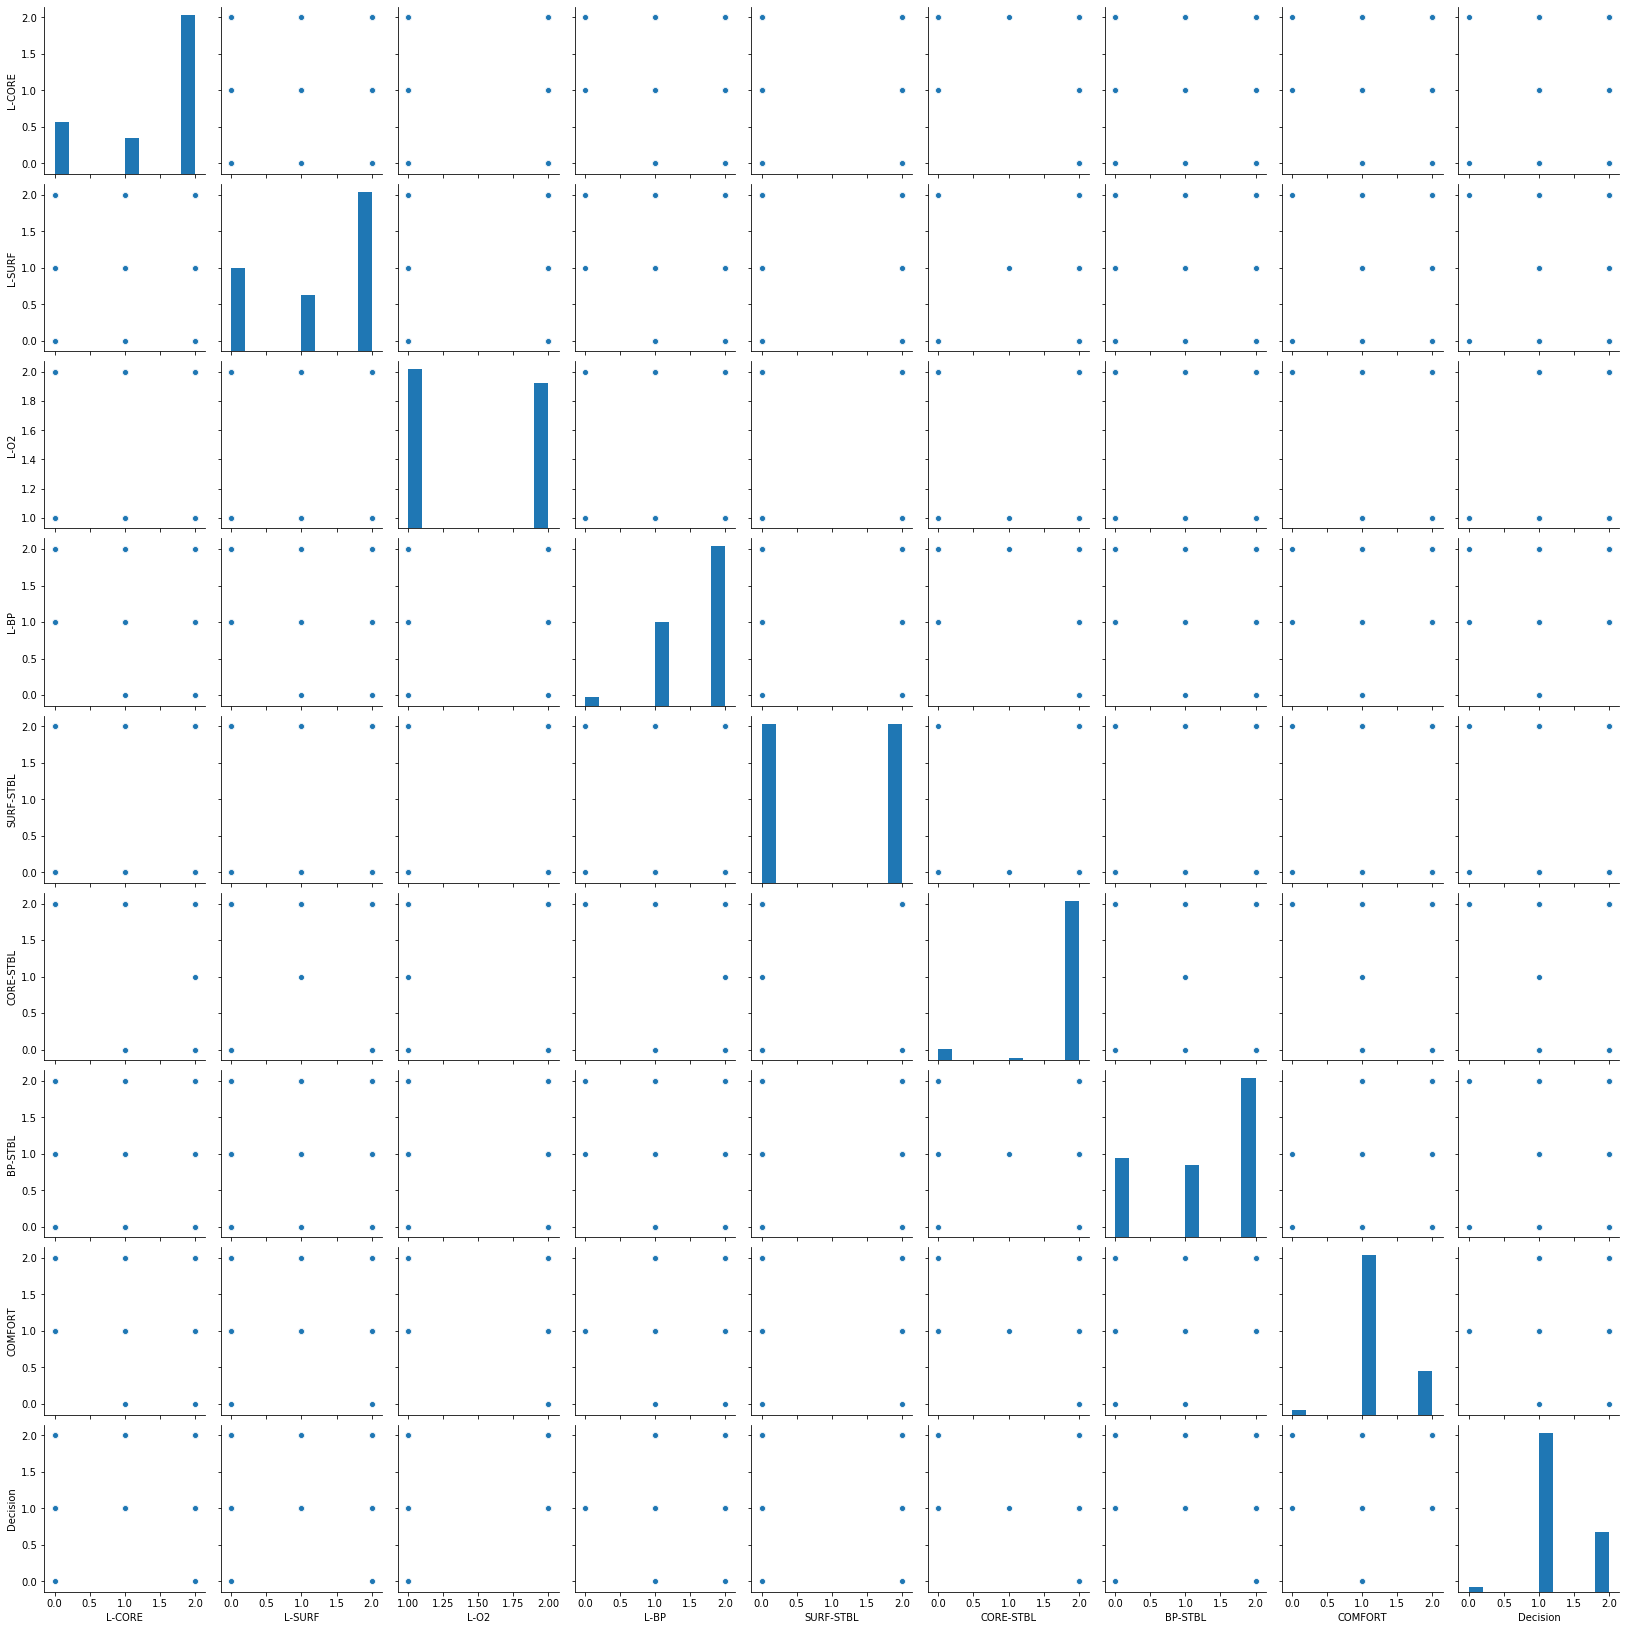

In [72]:
sb.pairplot(df_po_raw_data_pp)

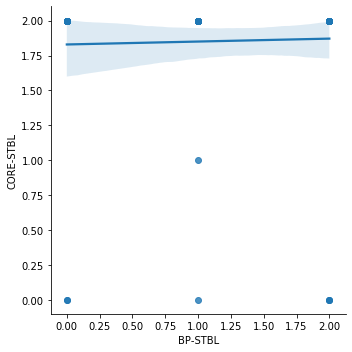

In [73]:
sb.lmplot(x='BP-STBL', y='CORE-STBL', data=df_po_raw_data_pp)

## Task 5: EDA for 'diamonds' dataset

In [74]:
df_diamonds_raw_data = pd.read_csv('../data/diamonds.csv')

### Text EDA

In [75]:
df_diamonds_raw_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [76]:
df_diamonds_raw_data_info, df_diamonds_raw_data_mem = get_df_info(df_diamonds_raw_data, include_unique_values=True)
print('{} has {} rows and {} cols, uses approx. {:.2f} MB'.format('df_diamonds_raw_data', df_diamonds_raw_data.shape[0], 
                                                                  df_diamonds_raw_data.shape[1], df_diamonds_raw_data_mem))
df_diamonds_raw_data_info

df_diamonds_raw_data has 53940 rows and 10 cols, uses approx. 12.62 MB


,column_name,type,null_count,nunique,unique_values
0,carat,<class 'numpy.float64'>,0,273,"[0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3..."
1,cut,<class 'str'>,0,5,"[Ideal, Premium, Good, Very Good, Fair]"
2,color,<class 'str'>,0,7,"[E, I, J, H, F, G, D]"
3,clarity,<class 'str'>,0,8,"[SI2, SI1, VS1, VS2, VVS2, VVS1, I1, IF]"
4,depth,<class 'numpy.float64'>,0,184,"[61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61...."
5,table,<class 'numpy.float64'>,0,127,"[55.0, 61.0, 65.0, 58.0, 57.0, 56.0, 54.0, 62...."
6,price,<class 'numpy.int64'>,0,11602,"[326, 327, 334, 335, 336, 337, 338, 339, 340, ..."
7,x,<class 'numpy.float64'>,0,554,"[3.95, 3.89, 4.05, 4.2, 4.34, 3.94, 4.07, 3.87..."
8,y,<class 'numpy.float64'>,0,552,"[3.98, 3.84, 4.07, 4.23, 4.35, 3.96, 4.11, 3.7..."
9,z,<class 'numpy.float64'>,0,375,"[2.43, 2.31, 2.63, 2.75, 2.48, 2.47, 2.53, 2.4..."


In [77]:
df_diamonds_raw_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Viz EDA

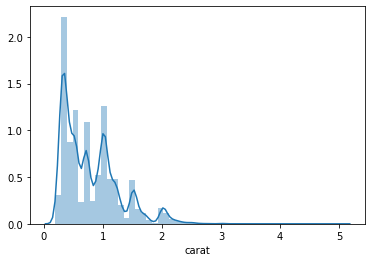

In [78]:
sb.distplot(df_diamonds_raw_data.carat)

# (right-skewed) asymmetric claw distribution, 
#  but can be approximated to a log-normal distribution

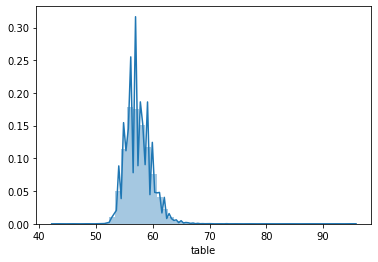

In [79]:
sb.distplot(df_diamonds_raw_data.table)

# claw distribution, can be approximated to a normal distribution

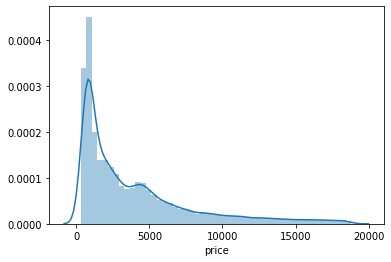

In [80]:
sb.distplot(df_diamonds_raw_data.price)

#  this does not follow the standard-normal distribution, as it is heavily skewed to the right 
#  - a log-normal distribution

#### Pairplot with distribution plot: 
     a) understanding the distribution of each variable 
     b) understanding the replation of each variable to another 
        - direction: positive or negative or neutral 
        - strength: strong or weak 
        - pattern: linear or non-linear

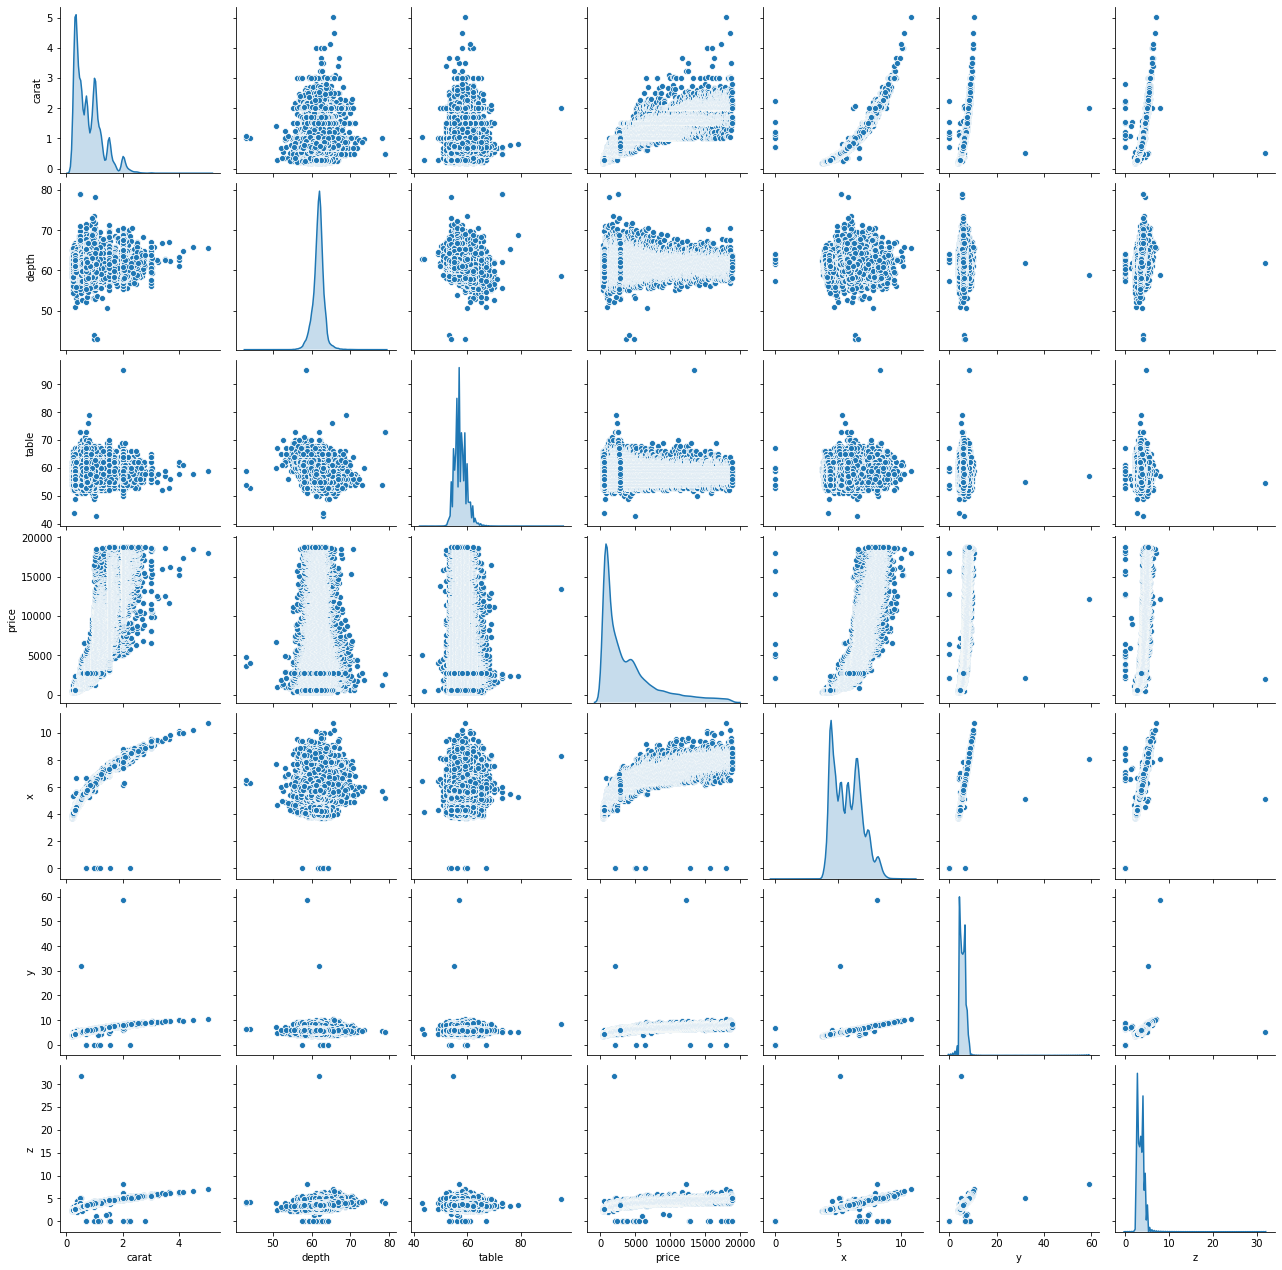

In [81]:
sb.pairplot(data=df_diamonds_raw_data, diag_kind='kde')

### Illlustration of the Central Limit Theorum (CLT)

CLT: Regardless of the distribution of a certain sample of data, with a large enough sample the distribution approaches the normal distribution (for many cases).

#### Create samples of a feature using the sample() method

<pre>
syntax: .sample(n, random_state): 
  n is the number of observations you want in the sample 
  random_state is the seed for random sampling, useful for reproducing results
</pre>

In [82]:
depth_sample_list = [df_diamonds_raw_data.depth.sample(n=10, random_state=0).to_numpy(),
                     df_diamonds_raw_data.depth.sample(n=25, random_state=0).to_numpy(),
                     df_diamonds_raw_data.depth.sample(n=50, random_state=0).to_numpy(),
                     df_diamonds_raw_data.depth.sample(n=100, random_state=0).to_numpy(),
                     df_diamonds_raw_data.depth.sample(n=200, random_state=0).to_numpy(),
                     df_diamonds_raw_data.depth.sample(n=300, random_state=0).to_numpy(),
                     df_diamonds_raw_data.depth.sample(n=400, random_state=0).to_numpy(),
                     df_diamonds_raw_data.depth.sample(n=500, random_state=0).to_numpy(),
                     df_diamonds_raw_data.depth.sample(n=600, random_state=0).to_numpy(),
                     df_diamonds_raw_data.depth.sample(n=700, random_state=0).to_numpy(),
                     df_diamonds_raw_data.depth.sample(n=800, random_state=0).to_numpy(),
                     df_diamonds_raw_data.depth.sample(n=900, random_state=0).to_numpy(),
                     df_diamonds_raw_data.depth.sample(n=1000, random_state=0).to_numpy(),
                     df_diamonds_raw_data.depth.sample(n=2500, random_state=0).to_numpy(),
                     df_diamonds_raw_data.depth.sample(n=5000, random_state=0).to_numpy(),
                     df_diamonds_raw_data.depth.sample(n=10000, random_state=0).to_numpy(),
                     df_diamonds_raw_data.depth.sample(n=20000, random_state=0).to_numpy(),
                     df_diamonds_raw_data.depth.sample(n=30000, random_state=0).to_numpy(),
                     df_diamonds_raw_data.depth.sample(n=40000, random_state=0).to_numpy(),
                     df_diamonds_raw_data.depth.to_numpy()]

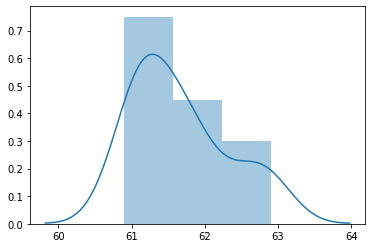

In [83]:
sb.distplot(depth_sample_list[0]) # right-skewed distribution that somewhat resembles a normal distribution

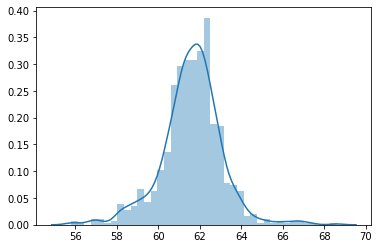

In [84]:
sb.distplot(depth_sample_list[10]) # more like a normal distribution now

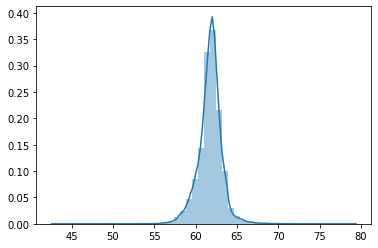

In [85]:
sb.distplot(depth_sample_list[-1]) # much more like a normal distribution

#### You can see that the data distribution progresses towards the 'normal' distribution as more observations are available in the sample

In [86]:
import matplotlib.animation as mpani
%matplotlib notebook

In [87]:
def ani_func(current):
    plt.cla()
    plt.hist(depth_sample_list[current], bins=15, histtype='stepfilled', range=(55, 69))
    plt.gca().set_title('N = {}'.format(len(depth_sample_list[current])))
    if current == 19:
        ani_obj.event_source.stop()

<IPython.core.display.Javascript object>


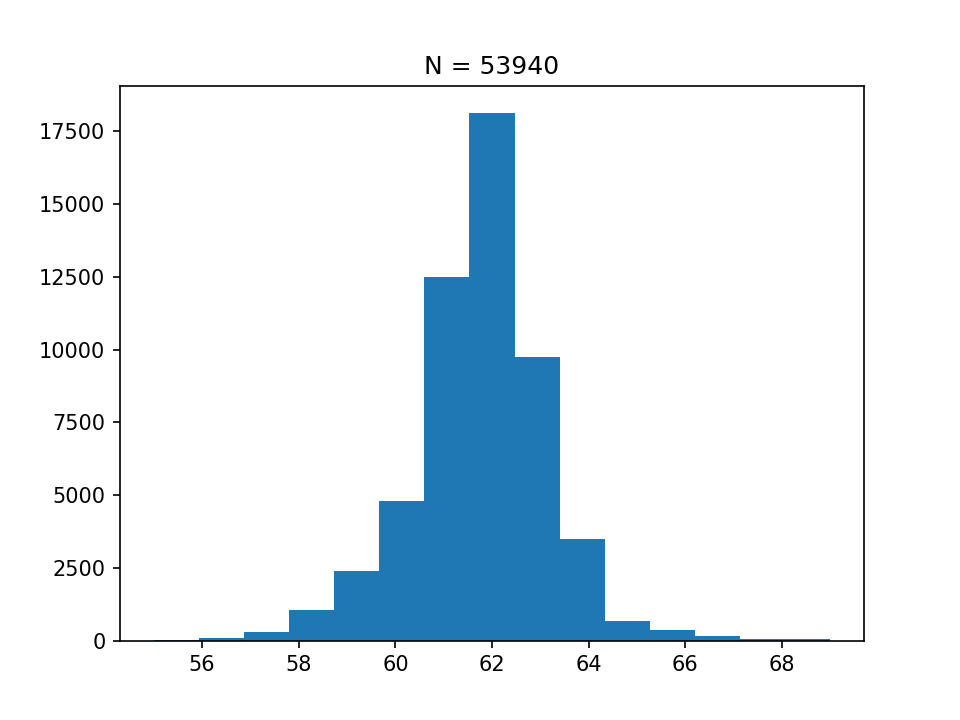

In [88]:
fig = plt.figure()
ani_obj = mpani.FuncAnimation(fig, ani_func, interval=2000)